# **Question 1**

In [1]:
root = "/content/drive/My Drive/2018AAPS1242H_NNFL (Assignment 1)/"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
y_train = pd.read_excel(root+"Data/training_output.xlsx",header=None)
y_test = pd.read_excel(root+"Data/test_output.xlsx",header=None)
x_train = pd.read_excel(root+"Data/training_feature_matrix.xlsx",header=None)
x_test = pd.read_excel(root+"Data/test_feature_matrix.xlsx",header=None)

Converged, No. of iterations:  183
Cost function:  [113.31733228]
Training error is  [0.46251972]


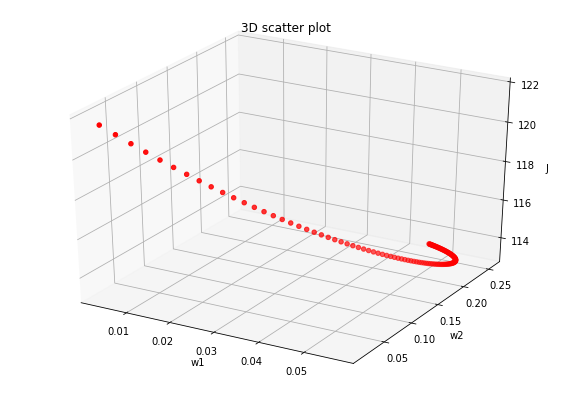

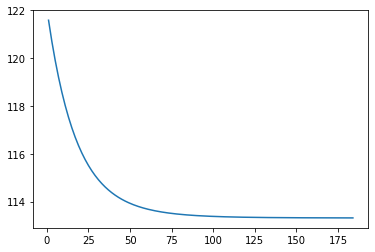

theta0 = [3.06385867e-05], theta1 = [0.04644186], theta2 = [0.25472562]


In [3]:
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    fig1 = plt.figure(figsize = (10, 7)) 
    ax1 = plt.axes(projection ="3d")

    m = x.shape[0] 
    J_list = []
    t1_list =[]
    t2_list = []
    iter_list = []
    #Initialize theta
    t0 = 0.01*np.random.random(1)
    t1 = 0.01*np.random.random(1)
    t2 = 0.01*np.random.random(1)
 
    #Total error
    J = 0.5*sum([(t0 + t1*x[i,0] + t2*x[i,1] - y[i,0])**2 for i in range(m)])
    
    while not converged:
        #Calculating gradient
        g0 = 1.0*sum([(t0 + t1*x[i,0] + t2*x[i,1] - y[i,0]) for i in range(m)]) 
        g1 = 1.0*sum([(t0 + t1*x[i,0] + t2*x[i,1] - y[i,0])*x[i,0] for i in range(m)])
        g2 = 1.0*sum([(t0 + t1*x[i,0] + t2*x[i,1] - y[i,0])*x[i,1] for i in range(m)])
 
        #Update the theta_temp
        temp0 = t0-alpha*g0
        temp1 = t1-alpha*g1
        temp2 = t2-alpha*g2
    
        #Update theta
        t0 = temp0
        t1 = temp1
        t2 = temp2

        #Mean squared error
        e = 0.5*sum([(t0 + t1*x[i,0] +t2*x[i,1] - y[i,0])**2 for i in range(m)]) 
        
        if abs(J-e) <= ep:
            print('Converged, No. of iterations: ', iter)
            print('Cost function: ',J)
            print("Training error is ", (J/x.shape[0]))
            converged = True
    
        J = e 
        iter += 1  

        #Update lists 
        iter_list.append(iter)
        J_list.append(J)
        t1_list.append(t1)
        t2_list.append(t2)
        if iter == max_iter:
          print('Max interactions exceeded')
          print('Cost function: ',J)
          print("Training error is ", (J/x.shape[0]))          
          converged = True
    
    ax1.scatter3D(t1_list,t2_list ,J_list, color = "red")
    plt.title("3D scatter plot")
    ax1.set_xlabel('w1')  
    ax1.set_ylabel('w2')  
    ax1.set_zlabel('J') 
    plt.show()

    plt.plot(iter_list,J_list)
    plt.show()
    return t0,t1,t2
 
if __name__ == '__main__':
  x = x_train.to_numpy()
  x_1 = x.copy()
  x_1[:,0] = (x[:,0]-np.mean(x[:,0])) / (np.std(x[:,0]))
  x_1[:,1] = (x[:,1]-np.mean(x[:,1])) / (np.std(x[:,1]))  
  y = y_train.to_numpy()
  y_1 = y.copy()
  y_1[:,0] = (y[:,0]-np.mean(y[:,0])) / (np.std(y[:,0])) 
  alpha = 0.0001
  ep = 0.0001
 
  theta0, theta1, theta2 = gradient_descent(alpha, x_1, y_1, ep, max_iter=10000)
  print(('theta0 = %s, theta1 = %s, theta2 = %s') %(theta0, theta1, theta2))

In [4]:
#MSE for test dataset
 
X_test = x_test.to_numpy()
Y_test = y_test.to_numpy()
X_test_norm = X_test.copy()
Y_test_norm = Y_test.copy()
X_test_norm[:,0] = (X_test[:,0]-np.mean(x[:,0])) / (np.std(x[:,0]))
X_test_norm[:,1] = (X_test[:,1]-np.mean(x[:,1])) / (np.std(x[:,1]))
Y_test_norm[:,0] = (Y_test[:,0]-np.mean(y[:,0])) / (np.std(y[:,0]))

error = 0
MSE = 0
y_test_predict = 0
for i in range(X_test.shape[0]):
  y_test_predict = theta0 + theta1*X_test_norm[i,0] + theta2*X_test_norm[i,1]
  error = error + (y_test_predict-Y_test_norm[i,0])**2
  MSE = error / (X_test.shape[0])
print(MSE)

[2.47991061]


# **Question 2**

**Part 1 : Stochastic Gradient Descent**

In [5]:
root = "/content/drive/My Drive/2018AAPS1242H_NNFL (Assignment 1)/"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

y_train = pd.read_excel(root+"Data/training_output.xlsx",header=None)
y_test = pd.read_excel(root+"Data/test_output.xlsx",header=None)
x_train = pd.read_excel(root+"Data/training_feature_matrix.xlsx",header=None)
x_test = pd.read_excel(root+"Data/test_feature_matrix.xlsx",header=None)

Converged, No. of iterations:  344
Cost function:  [114.8821571]


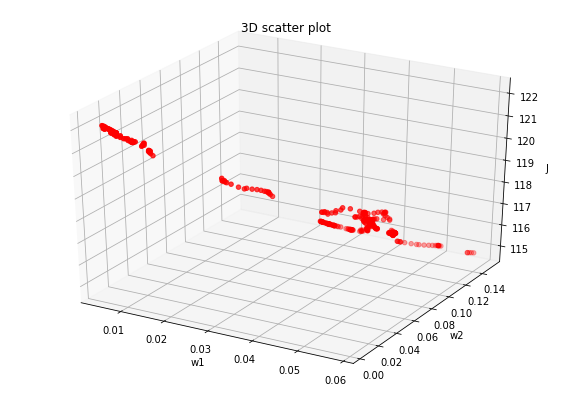

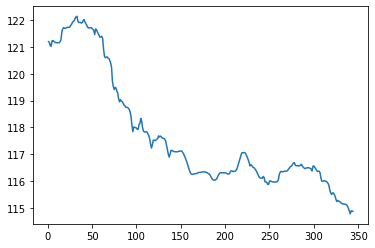

theta0 = [0.03347844], theta1 = [0.05828171], theta2 = [0.14779662]


In [6]:
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    fig1 = plt.figure(figsize = (10, 7)) 
    ax1 = plt.axes(projection ="3d")

    m = x.shape[0]
    i=0
    J_list = []
    t1_list = []
    t2_list = []
    iter_list = []
    t0 = 0.05*np.random.random(1)
    t1 = 0.05*np.random.random(1)
    t2 = 0.05*np.random.random(1)
 
    J = 0.5*sum([(t0 + t1*x[i,0] + t2*x[i,1]  - y[i,0])**2 for i in range(m)])
    
    while not converged:
        #Calculating gradient
        while(i<m):
          g0 = 1.0 * (t0 + t1*x[i,0] + t2*x[i,1] - y[i,0])
          g1 = 1.0 * ((t0 + t1*x[i,0] + t2*x[i,1] - y[i,0])*x[i,0])
          g2 = 1.0 * ((t0 + t1*x[i,0] + t2*x[i,1] - y[i,0])*x[i,1])

          temp0 = t0-alpha*g0
          temp1 = t1-alpha*g1
          temp2 = t2-alpha*g2
      
          t0 = temp0
          t1 = temp1
          t2 = temp2
          i = i+1
          if i==m:
            i = 0
          
          #Mean squared error
          e = 0.5*sum( [ (t0 + t1*x[q,0] +t2*x[q,1] - y[q,0])**2 for q in range(m)] ) 
          
          if abs(J-e) <= ep:
              print('Converged, No. of iterations: ', iter)
              print('Cost function: ',J)
              converged = True
              i = m
              break
      
          J = e 
          iter += 1
          iter_list.append(iter)
          J_list.append(J)
          t1_list.append(t1)
          t2_list.append(t2)
          if iter == max_iter:
            print('Max interactions exceeded')
            print('Cost function: ',J)
            converged = True
            i = m
            break

    ax1.scatter3D(t1_list, t2_list, J_list, color="red")
    plt.title("3D scatter plot")
    ax1.set_xlabel('w1')  
    ax1.set_ylabel('w2')  
    ax1.set_zlabel('J') 
    plt.show()

    plt.plot(iter_list,J_list)
    plt.show()
    return t0,t1,t2
 
if __name__ == '__main__':
  x = x_train.to_numpy()
  x_1 = x.copy()
  x_1[:,0] = (x[:,0]-np.mean(x[:,0])) / (np.std(x[:,0]))
  x_1[:,1] = (x[:,1]-np.mean(x[:,1])) / (np.std(x[:,1]))  
  y = y_train.to_numpy()
  y_1 = y.copy()
  y_1[:,0] = (y[:,0]-np.mean(y[:,0])) / (np.std(y[:,0])) 
  alpha = 0.002
  ep = 0.00001
 
  theta0, theta1, theta2 = gradient_descent(alpha, x_1, y_1, ep, max_iter=10000)
  print(('theta0 = %s, theta1 = %s, theta2 = %s') %(theta0, theta1, theta2))


In [7]:
#MSE for test dataset
 
X_test = x_test.to_numpy()
Y_test = y_test.to_numpy()
X_test_norm = X_test.copy()
Y_test_norm = Y_test.copy()
X_test_norm[:,0] = (X_test[:,0]-np.mean(X_test[:,0])) / (np.std(X_test[:,0]))
X_test_norm[:,1] = (X_test[:,1]-np.mean(X_test[:,1])) / (np.std(X_test[:,1])) 
Y_test_norm[:,0] = (Y_test[:,0]-np.mean(Y_test[:,0])) / (np.std(Y_test[:,0]))
error = 0
MSE = 0
y_test_predict = 0
for i in range(X_test.shape[0]):
  y_test_predict = theta0 + theta1*X_test_norm[i,0] + theta2*X_test_norm[i,1]
  error = error + (y_test_predict-Y_test_norm[i,0])**2
  MSE = error / (X_test.shape[0])
print(MSE)

[0.97910668]


**Part 2 : Mini-Batch Gradient Descent**

In [8]:
root = "/content/drive/My Drive/2018AAPS1242H_NNFL (Assignment 1)/"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

y_train = pd.read_excel(root+"Data/training_output.xlsx",header=None)
y_test = pd.read_excel(root+"Data/test_output.xlsx",header=None)
x_train = pd.read_excel(root+"Data/training_feature_matrix.xlsx",header=None)
x_test = pd.read_excel(root+"Data/test_feature_matrix.xlsx",header=None)

In [9]:
frames = [x_train,y_train]
df1 = pd.concat(frames,axis=1)
df1 = df1.sample(frac=1)

Converged, No. of iterations:  356
Cost function:  [113.31708373]


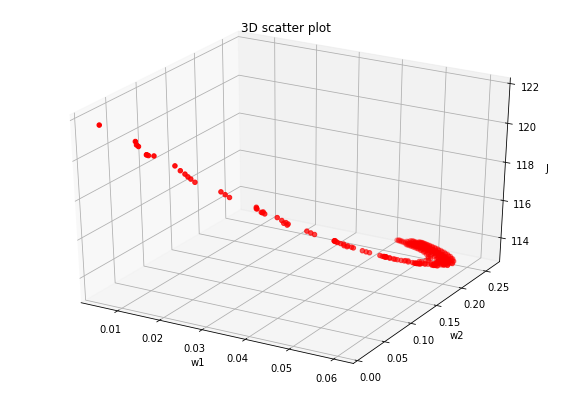

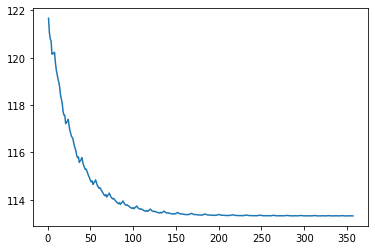

theta0 = [-0.00108764], theta1 = [0.04749984], theta2 = [0.2589071]


In [10]:
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    fig1 = plt.figure(figsize = (10, 7)) 
    ax1 = plt.axes(projection ="3d")
    mini = 0
    difference = 16
    m = x.shape[0] 
    J_list = []
    t1_list =[]
    t2_list = []
    iter_list = []
    t0 = 0.01*np.random.random(1)
    t1 = 0.01*np.random.random(1)
    t2 = 0.01*np.random.random(1)

    J = 0.5*sum([(t0 + t1*x[i,0] + t2*x[i,1]  - y[i,0])**2 for i in range(m)])

    while not converged:
        #Calculating gradient
        g0 = 1.0 * sum([(t0 + t1*x[i,0] + t2*x[i,1] - y[i,0]) for i in range(mini,mini+difference)]) 
        g1 = 1.0 * sum([(t0 + t1*x[i,0] + t2*x[i,1] - y[i,0])*x[i,0] for i in range(mini,mini+difference)])
        g2 = 1.0 * sum([(t0 + t1*x[i,0] + t2*x[i,1] - y[i,0])*x[i,1] for i in range(mini,mini+difference)])
 
        temp0 = t0-alpha*g0
        temp1 = t1-alpha*g1
        temp2 = t2-alpha*g2
    
        t0 = temp0
        t1 = temp1
        t2 = temp2
        e = 0.5*sum( [ (t0 + t1*x[q,0] +t2*x[q,1] - y[q,0])**2 for q in range(0,m)] )  
        mini = mini+16

        if (m-mini)>=16:
          difference = 16
        elif (m-mini)<16:
          difference = (m-mini)

        if abs(J-e) <= ep:
            print('Converged, No. of iterations: ', iter)
            print('Cost function: ',J)
            converged = True
    
        J = e 
        iter += 1  
        iter_list.append(iter)
        J_list.append(J)
        t1_list.append(t1)
        t2_list.append(t2)
        if iter == max_iter:
          print('Max interactions exceeded')
          print('Cost function ',J)
          converged = True
        
        if mini>=m:
          mini = 0
          difference = 16
          continue

    ax1.scatter3D(t1_list,t2_list ,J_list, color = "red")
    plt.title("3D scatter plot")
    ax1.set_xlabel('w1')  
    ax1.set_ylabel('w2')  
    ax1.set_zlabel('J') 
    plt.show()

    plt.plot(iter_list,J_list)
    plt.show()
    return t0,t1,t2
 
if __name__ == '__main__':
  df1_numpy_arr = df1.to_numpy()
  x = df1_numpy_arr[:,:2]
  x_1 = x.copy()
  x_1[:,0] = (x[:,0]-np.mean(x[:,0])) / (np.std(x[:,0]))
  x_1[:,1] = (x[:,1]-np.mean(x[:,1])) / (np.std(x[:,1]))  
  y = df1_numpy_arr[:,2:]
  y_1 = y.copy()
  y_1[:,0] = (y[:,0]-np.mean(y[:,0])) / (np.std(y[:,0])) 
  alpha = 0.00099
  ep = 0.0001 
 
  theta0, theta1, theta2 = gradient_descent(alpha, x_1, y_1, ep, max_iter=1000)
  print(('theta0 = %s, theta1 = %s, theta2 = %s') %(theta0, theta1, theta2))


In [11]:
# Calculate MSE for test dataset
 
X_test = x_test.to_numpy()
Y_test = y_test.to_numpy()
X_test_norm = X_test.copy()
Y_test_norm = Y_test.copy()
X_test_norm[:,0] = (X_test[:,0]-np.mean(x[:,0])) / (np.std(x[:,0]))
X_test_norm[:,1] = (X_test[:,1]-np.mean(x[:,1])) / (np.std(x[:,1])) 
Y_test_norm[:,0] = (Y_test[:,0]-np.mean(y[:,0])) / (np.std(y[:,0]))
error = 0
MSE = 0
y_test_predict = 0
for i in range(X_test.shape[0]):
  y_test_predict = theta0 + theta1*X_test_norm[i,0] + theta2*X_test_norm[i,1]
  error = error + (y_test_predict-Y_test_norm[i,0])**2
  MSE = error / (X_test.shape[0])
print(MSE)

[2.46801459]
